In [18]:
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [20]:
#Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
#Split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42,)

In [22]:
# Model
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

C:\Users\Ali\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [24]:
# Callbacks
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [25]:
# Train
history = model.fit(
    X_train, y_train,
    validation_split=0.15,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4223 - loss: 40.9077 - val_accuracy: 0.4928 - val_loss: 2.0265
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5648 - loss: 16.1720 - val_accuracy: 0.8696 - val_loss: 2.4224
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6477 - loss: 12.2985 - val_accuracy: 0.6812 - val_loss: 2.5369
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6477 - loss: 8.7998 - val_accuracy: 0.7971 - val_loss: 1.4459
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7150 - loss: 7.5652 - val_accuracy: 0.8841 - val_loss: 1.5725
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7383 - loss: 4.7530 - val_accuracy: 0.8841 - val_loss: 1.6932
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7228 - loss: 3.9458 - val_accuracy: 0.8841 - val_loss: 1.3825
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7073 - loss: 3.9311 - val_accuracy: 0.8841

In [26]:
# Evaluation
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[35  8]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        43
           1       0.90      1.00      0.95        71

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114

ROC-AUC: 0.9937766131673764


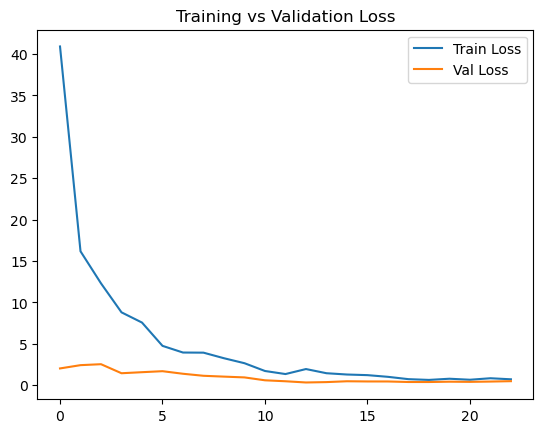

In [27]:
# Plot learning curves
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()